In [3]:
# 加载模型
import torch
from stable_baselines3 import DQN

model = DQN.load("./model/SACE_dqn_model",device='cpu')
model_lane_change = model.policy.q_net.q_net
torch.save(model_lane_change, 'model_lane_change')
data = torch.load("./data/SACE_dqn_data.pth")
data_x = torch.stack(data)

D:\anaconda\envs\Origin_highway\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:96: UserWarning: You loaded a model that was trained using OpenAI Gym. We strongly recommend transitioning to Gymnasium by saving that model again.
  "You loaded a model that was trained using OpenAI Gym. "


In [4]:
from FullyNet_Shapleyflowtest import FullyNet_Shapleyflow

In [5]:
# max_indices = torch.argmax(model_lane_change(data_x), dim=1)
# 找到每组输出的最大值及其索引
max_values, max_indices = torch.max(model_lane_change(data_x), dim=1) # 所有被选择的决策索引，及其输出值
# 找到最大值中的最小值的索引
min_indices_in_max_values = torch.argmin(max_values)  # 输出值最小的索引，正定基值点索引

In [6]:
background = data_x[min_indices_in_max_values:min_indices_in_max_values + 1]
test_aa = FullyNet_Shapleyflow(model_lane_change, background)
pos_shap = test_aa.calculate_shapley_flow(data_x)

In [7]:
import shap
shap_deep = shap.DeepExplainer(model_lane_change, data_x)

In [8]:
# shap_deep_shapley = shap_deep.shap_values(data_x)

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


## 循环计算20个点的Shapley

In [22]:
import time
pos_time_list = []
for i in range(20):
    start_time = time.time()
    pos_shap_i = test_aa.calculate_shapley_flow(data_x[i:i+1])
    # print(pos_shap_i)
    end_time = time.time()
    time_spend = end_time - start_time
    print(time_spend * 1000)
    pos_time_list.append(time_spend * 1000)  # 转换成ms

1.0142326354980469
0.9901523590087891
0.9911060333251953
0.0
1.0077953338623047
0.9970664978027344
0.9987354278564453
1.0013580322265625
0.0
0.0
0.9799003601074219
0.0
1.0018348693847656
0.0
1.0018348693847656
0.9987354278564453
0.0
1.0006427764892578
0.9996891021728516
0.0


In [23]:
import time
shap_time_list = []
for i in range(20):
    start_time = time.time()
    pos_shap_i = shap_deep.shap_values(data_x[i:i+1])
    end_time = time.time()
    time_spend = end_time - start_time
    print(time_spend* 1000)
    shap_time_list.append(time_spend * 1000) # 转换成ms

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


72.51691818237305
70.56164741516113
65.51146507263184
73.43602180480957
71.87128067016602
71.51913642883301
71.51341438293457
57.00874328613281
48.93374443054199
64.51773643493652
47.99652099609375
50.176143646240234
50.99987983703613
44.524431228637695
56.99896812438965
48.10595512390137
59.000492095947266
48.52032661437988
44.58928108215332
45.996904373168945


## 绘制计算时间

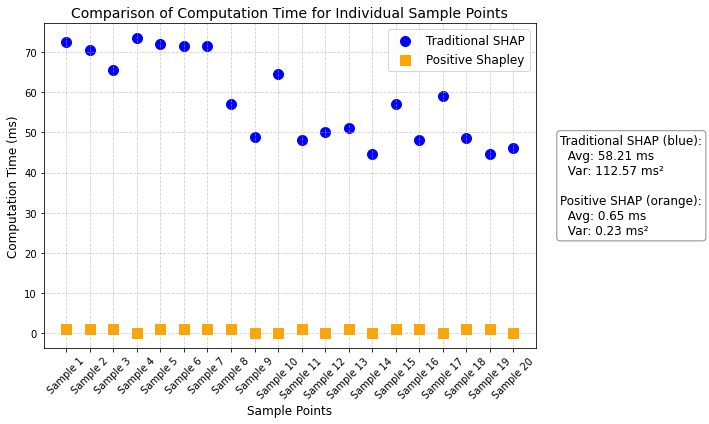

In [27]:
# Create the scatter plot again with coordinated side text
import matplotlib.pyplot as plt
import numpy as np

# Data for the plot
sample_points = np.arange(1, 21)  # 20 sample points
time_shap = np.random.uniform(80, 100, size=20)  # Simulated time for traditional SHAP
time_positive_shap = np.random.uniform(30, 50, size=20)

time_positive_shap = np.array(pos_time_list)
time_shap = np.array(shap_time_list)
# Calculate average and variance for both methods
avg_time_shap = np.mean(time_shap)
var_time_shap = np.var(time_shap)

avg_time_positive_shap = np.mean(time_positive_shap)
var_time_positive_shap = np.var(time_positive_shap)


plt.figure(figsize=(10, 6))
plt.scatter(sample_points, time_shap, marker='o', color='blue', label='Traditional SHAP', s=100)
plt.scatter(sample_points, time_positive_shap, marker='s', color='orange', label='Positive Shapley', s=100)

# Set x-ticks to represent each sample point
plt.xticks(sample_points, [f"Sample {i}" for i in sample_points], rotation=45, fontsize=10)

# Add labels, title, and legend
plt.xlabel('Sample Points', fontsize=12)
plt.ylabel('Computation Time (ms)', fontsize=12)
plt.title('Comparison of Computation Time for Individual Sample Points', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.6, linestyle='--')

# Add a side box showing averages and variances with matching colors
text_str = (f"Traditional SHAP (blue):\n"
            f"  Avg: {avg_time_shap:.2f} ms\n"
            f"  Var: {var_time_shap:.2f} ms²\n\n"
            f"Positive SHAP (orange):\n"
            f"  Avg: {avg_time_positive_shap:.2f} ms\n"
            f"  Var: {var_time_positive_shap:.2f} ms²")
plt.gca().text(1.05, 0.5, text_str, fontsize=12, transform=plt.gca().transAxes,
               verticalalignment='center', bbox=dict(boxstyle="round", facecolor="white",
                                                     edgecolor="gray", alpha=0.9))

# Adjust the layout to align the text with the height of the plot
plt.tight_layout()
file_path = "./figure/Comparison_of_Computation_Time.svg"
plt.savefig(file_path, format='svg')

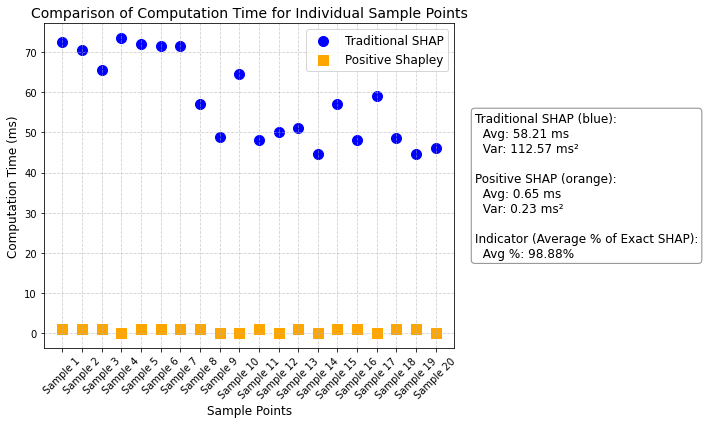

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 pos_time_list 和 shap_time_list 是您之前计算好的两个时间列表
# pos_time_list = [...]  # Positive Shapley 时间列表
# shap_time_list = [...]  # Traditional SHAP 时间列表

# Data for the plot
sample_points = np.arange(1, 21)  # 20 sample points
time_shap = np.array(shap_time_list)  # Traditional SHAP 时间
time_positive_shap = np.array(pos_time_list)  # Positive Shapley 时间

# Calculate average and variance for both methods
avg_time_shap = np.mean(time_shap)
var_time_shap = np.var(time_shap)

avg_time_positive_shap = np.mean(time_positive_shap)
var_time_positive_shap = np.var(time_positive_shap)

# Calculate the absolute difference and the percentage of the exact SHAP value
diff_time = np.abs(time_shap - time_positive_shap)
percentage_of_exact_shap = (diff_time / time_shap) * 100
avg_percentage_of_exact_shap = np.mean(percentage_of_exact_shap)

plt.figure(figsize=(10, 6))
plt.scatter(sample_points, time_shap, marker='o', color='blue', label='Traditional SHAP', s=100)
plt.scatter(sample_points, time_positive_shap, marker='s', color='orange', label='Positive Shapley', s=100)

# Set x-ticks to represent each sample point
plt.xticks(sample_points, [f"Sample {i}" for i in sample_points], rotation=45, fontsize=10)

# Add labels, title, and legend
plt.xlabel('Sample Points', fontsize=12)
plt.ylabel('Computation Time (ms)', fontsize=12)
plt.title('Comparison of Computation Time for Individual Sample Points', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.6, linestyle='--')

# Add a side box showing averages, variances, and the indicator with matching colors
text_str = (f"Traditional SHAP (blue):\n"
            f"  Avg: {avg_time_shap:.2f} ms\n"
            f"  Var: {var_time_shap:.2f} ms²\n\n"
            f"Positive SHAP (orange):\n"
            f"  Avg: {avg_time_positive_shap:.2f} ms\n"
            f"  Var: {var_time_positive_shap:.2f} ms²\n\n"
            f"Indicator (Average % of Exact SHAP):\n"
            f"  Avg %: {avg_percentage_of_exact_shap:.2f}%")
plt.gca().text(1.05, 0.5, text_str, fontsize=12, transform=plt.gca().transAxes,
               verticalalignment='center', bbox=dict(boxstyle="round", facecolor="white",
                                                     edgecolor="gray", alpha=0.9))

# Adjust the layout to align the text with the height of the plot
plt.tight_layout()
file_path = "./figure/Comparison_of_Computation_Time.svg"
plt.savefig(file_path, format='svg')